## Image Perception and Identifying Coastal Bedrock Topography 
A project for PUI2016 by dlk253

For this project, the CUSP IT department had to install the Cartopy and Basemap packages. 

In [71]:
#all the packages installed here are running on compute. 
%matplotlib inline
from osgeo import gdal
from numpy import gradient
from numpy import pi
from numpy import arctan
from numpy import arctan2
from numpy import sin
from numpy import cos
from numpy import sqrt
from numpy import zeros
from numpy import uint8
import matplotlib.pyplot as plt
import numpy as np
from osgeo import gdal
import os
import numpy as np
from cartopy import config
import cartopy.crs as ccrs
import zipfile as zf
import matplotlib.cbook as cbook
import matplotlib.image as mpimg
import cartopy
from cartopy.feature import NaturalEarthFeature, LAND, COASTLINE



In [72]:
#get the zipfile for the geotiffs both tiled and individual
!curl -O "http://www.danakarwas.com/bedrock_states.zip"
zip_ref = zf.ZipFile('bedrock_states.zip','r')
zip_ref.extractall(os.getenv("PUIDATA"))

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 68.8M  100 68.8M    0     0  32.5M      0  0:00:02  0:00:02 --:--:-- 32.7M


In [73]:
img_path= os.getenv("PUIDATA") + "/bedrock_states/cali_test_merge.tif"

Generate a Hillshade from a Geotiff and save the Hillshade as a PNG.

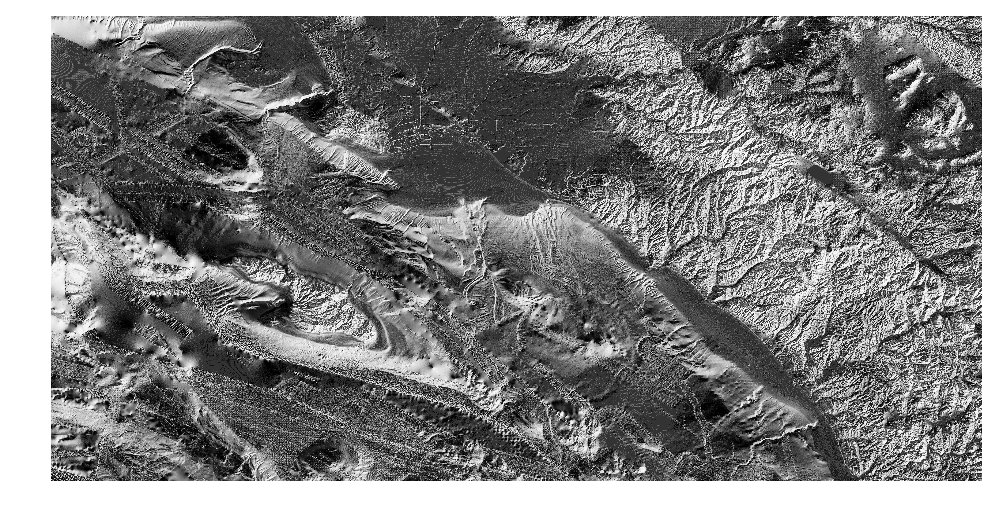

In [74]:
#create a hillshade from the ETOPO1 geotiff tile
#the shaded relief example was derived from this tutorial: http://geoexamples.blogspot.com/2014/03/shaded-relief-images-using-gdal-python.html

fig = plt.figure(figsize=(12, 12))

def hillshade(array, azimuth, angle_altitude):
        
    x, y = gradient(array)
    slope = pi/2. - arctan(sqrt(x*x + y*y))
    aspect = arctan2(-x, y)
    azimuthrad = azimuth*pi / 180.
    altituderad = angle_altitude*pi / 180.
     
 
    shaded = sin(altituderad) * sin(slope)\
     + cos(altituderad) * cos(slope)\
     * cos(azimuthrad - aspect)
    return 255*(shaded + 1)/2
pixel_y =33.6
pixel_x =-118.1437
ds = gdal.Open(img_path)  
#ds = gdal.Open('california_right.tif')  
band = ds.GetRasterBand(1)  
arr = band.ReadAsArray()

hs_array = hillshade(arr,315, 45)
plt.imshow(hs_array,cmap='Greys')
plt.axis('off')
#plt.plot (pixel_x, pixel_y, 'ro')
plt.savefig('raster_cal.png', dpi=100, bbox_inches='tight')
#look at this link: https://jgomezdans.github.io/gdal_notes/first_steps.html
plt.show()

Fig 1. Hillshade raster of the california coast. Can you guess where Long Beach is located?

## Obtain Image Info from GeoTiff

From terminal run gdalinfo cali_test_merge.tif

Use this to understand extents of image and coordinates.

[dlk253@compute bedrock_states]$ gdalinfo cali_test_merge.tif 
Driver: GTiff/GeoTIFF
Files: cali_test_merge.tif
Size is 7201, 3601
Coordinate System is:
GEOGCS["WGS 84",
    DATUM["WGS_1984",
        SPHEROID["WGS 84",6378137,298.257223563,
            AUTHORITY["EPSG","7030"]],
        AUTHORITY["EPSG","6326"]],
    PRIMEM["Greenwich",0],
    UNIT["degree",0.0174532925199433],
    AUTHORITY["EPSG","4326"]]
Origin = (-119.000139840890000,34.000139160890001)
Pixel Size = (0.000277777780000,-0.000277777780000)
Metadata:
  AREA_OR_POINT=Area
Image Structure Metadata:
  INTERLEAVE=BAND
Corner Coordinates:
Upper Left  (-119.0001398,  34.0001392) (119d 0' 0.50"W, 34d 0' 0.50"N)
Lower Left  (-119.0001398,  32.9998614) (119d 0' 0.50"W, 32d59'59.50"N)
Upper Right (-116.9998620,  34.0001392) (116d59'59.50"W, 34d 0' 0.50"N)
Lower Right (-116.9998620,  32.9998614) (116d59'59.50"W, 32d59'59.50"N)
Center      (-118.0000009,  33.5000003) (118d 0' 0.00"W, 33d30' 0.00"N)
Band 1 Block=7201x1 Type=Int16, ColorInterp=Gray


Read in the png raster hillshade image and put it into img

In [75]:
img=mpimg.imread('raster_cal.png')

Estabilash the extents

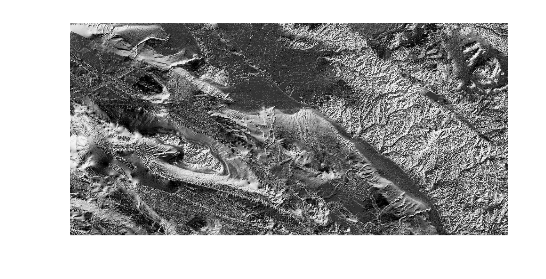

In [76]:
plt.imshow(img, zorder=0, extent=[-119.0001398, -116.9998620, 32.9998614, 34.0001392])
plt.axis('off')
plt.show()

Fig 2: Show the test load of the raster_cal.png
The code below tests the plotting of coastlines and cities. The cities were plotted and labeled as lat long points. The coastlines were plotted by using the cartopy package with ax.coastlines

The code below is a test to determine if the coastlines and city points will plot over the png in the correct location.

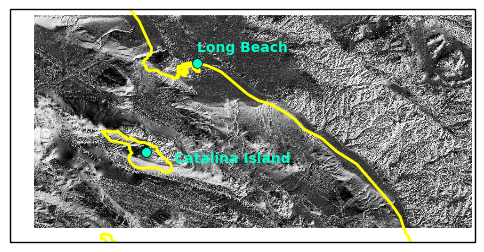

In [77]:
#test to see if the plot will show the coastlines and city names as lat lon points
img_extent = (-119.0001398, -116.9998620, 32.9998614, 34.0001392)
ax = plt.axes(projection=ccrs.PlateCarree())
ax.imshow(img, origin='upper', extent=img_extent, transform=ccrs.PlateCarree())
ax.coastlines(resolution='10m', color='#ffff00', linewidth=2)
ax.plot(-118.1937, 33.7701, 'bo', markersize=7, transform=ccrs.Geodetic(),color='#00FFCC')
ax.text(-118.1937, 33.8201, 'Long Beach', transform=ccrs.Geodetic(), color='#00FFCC',weight='bold', fontname ='Helvetica')
ax.plot(-118.4163, 33.3879, 'bo', markersize=7, transform=ccrs.Geodetic(),color='#00FFCC')
ax.text(-118.2937, 33.3401, 'Catalina Island', transform=ccrs.Geodetic(), color='#00FFCC',weight='bold', fontname ='Helvetica')
#ax.add_feature(cartopy.feature.OCEAN)
#ax.add_feature(cartopy.feature.LAND)
plt.axis('off')
plt.show()

Fig 3. The coastlines, cities, and city labels are plotted on top of the img.

The code below was provided by Federica as inspiration for making the notebook interactive. An input box accepts five valuse (1-5) to determine what will plot. Please look for the input box below the code.

2
input:
1 California Coast as Bedrock 
2 Overplot with coast lines
3 Overplot with select city points
4 Overplot with city and coastlines
5 Overplot with land, water, and city

Place select number in the input box, press enter, then put the number in the box again to generate plot

2


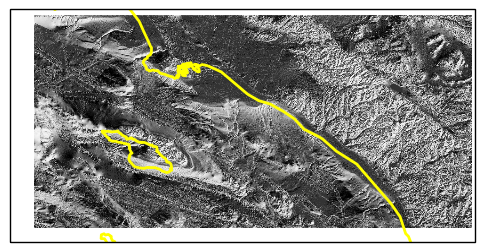

In [78]:
input()
print ('''input:
1 California Coast as Bedrock 
2 Overplot with coast lines
3 Overplot with select city points
4 Overplot with city and coastlines
5 Overplot with land, water, and city

Place select number in the input box, press enter, then put the number in the box again to generate plot
''')
a = int(input())

if a == 1:
    plt.title('California Coast Bedrock')
    plt.imshow(img, zorder=0, extent=[-119.0001398, -116.9998620, 32.9998614, 34.0001392])
    plt.show()
elif a == 2:
    img_extent = (-119.0001398, -116.9998620, 32.9998614, 34.0001392)
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.imshow(img, origin='upper', extent=img_extent, transform=ccrs.PlateCarree())
    ax.coastlines(resolution='10m', color='#ffff00', linewidth=2)
    plt.axis('off')
    plt.show()
elif a == 3:
    img_extent = (-119.0001398, -116.9998620, 32.9998614, 34.0001392)
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.imshow(img, origin='upper', extent=img_extent, transform=ccrs.PlateCarree())
    #ax.coastlines(resolution='10m', color='#ffff00', linewidth=2)
    ax.plot(-118.1937, 33.7701, 'bo', markersize=7, transform=ccrs.Geodetic(),color='#00FFCC')
    ax.text(-118.1937, 33.8201, 'Long Beach', transform=ccrs.Geodetic(), color='#00FFCC',weight='bold', fontname ='Helvetica')
    ax.plot(-118.4163, 33.3879, 'bo', markersize=7, transform=ccrs.Geodetic(),color='#00FFCC')
    ax.text(-118.2937, 33.3401, 'Catalina Island', transform=ccrs.Geodetic(), color='#00FFCC',weight='bold', fontname ='Helvetica')
    plt.axis('off')
    plt.show()
elif a == 4:
    img_extent = (-119.0001398, -116.9998620, 32.9998614, 34.0001392)
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.imshow(img, origin='upper', extent=img_extent, transform=ccrs.PlateCarree())
    ax.coastlines(resolution='10m', color='#ffff00', linewidth=2)
    ax.plot(-118.1937, 33.7701, 'bo', markersize=7, transform=ccrs.Geodetic(),color='#00FFCC')
    ax.text(-118.1937, 33.8201, 'Long Beach', transform=ccrs.Geodetic(), color='#00FFCC',weight='bold', fontname ='Helvetica')
    ax.plot(-118.4163, 33.3879, 'bo', markersize=7, transform=ccrs.Geodetic(),color='#00FFCC')
    ax.text(-118.2937, 33.3401, 'Catalina Island', transform=ccrs.Geodetic(), color='#00FFCC',weight='bold', fontname ='Helvetica')
    plt.axis('off')
    plt.show()
elif a == 5:
    img_extent = (-119.0001398, -116.9998620, 32.9998614, 34.0001392)
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.imshow(img, origin='upper', extent=img_extent, transform=ccrs.PlateCarree())
    ax.plot(-118.1937, 33.7701, 'bo', markersize=7, transform=ccrs.Geodetic(),color='#00FFCC')
    ax.text(-118.1937, 33.8201, 'Long Beach', transform=ccrs.Geodetic(), color='#00FFCC',weight='bold', fontname ='Helvetica')
    ax.plot(-118.4163, 33.3879, 'bo', markersize=7, transform=ccrs.Geodetic(),color='#00FFCC')
    ax.text(-118.2937, 33.3401, 'Catalina Island', transform=ccrs.Geodetic(), color='#00FFCC',weight='bold', fontname ='Helvetica')
    ax.add_feature(cartopy.feature.OCEAN)
    ax.add_feature(cartopy.feature.LAND)
    plt.axis('off')
    plt.show()
else:
    print ("your input is invalid)")


Fig 4. Show the reslut of the input box. 